# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the adult data set to work with.
2. I will be predicting whether or not an individual earns more than 50K/year given their demographic information and other characteristics.
3. This will be a binary classification problem since it is a YES or NO answer to earning more than 50K/year.
4. My features are age, education, occupation, sex, and martial status.
5. This is an important problem with real business value because it can help companies determine whether or not an individual has the financial capability and earn enough money to handle mortgage, evaluate credit scorings, or detect frauds.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print("Total rows: ", df.shape[0])

# First handle missing values -- delete them
missing_values = df.isna().sum()
print("missing_values:\n", missing_values)
clean_df = df.dropna()

updated_missing_values = clean_df.isna().sum()
print("updated_missing_values:\n", updated_missing_values)

# Remove any duplicate rows
no_dup_df = clean_df.drop_duplicates()

# Select relevant columns and remove irrelevant columns
selected_columns = ['age', 'education', 'occupation', 'sex_selfID', 'marital-status', 'income_binary']
final_df = no_dup_df[selected_columns]

# Define target feature and features
X = final_df[selected_columns]
y = final_df['income_binary']

print("\n--------------Final columns and rows--------------")
print("Number of Features: ", final_df.shape[1])
print("Feature Names: ", final_df.columns)
print("Number of Examples: ", final_df.shape[0])

Total rows:  32561
missing_values:
 age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64
updated_missing_values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

--------------Final columns and rows--------------
Number of Features:  6
Feature Names:  Index(['age', 'education', 'occupation', 'sex_selfID', 'marital-status',
       'income_binary'],
      dtype='object')
Number of Examples:  29694


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, I decided narrow down to some specific certain features that I thought were more relevant. The features include: 'age', 'education', 'occupation', 'sex_selfID', 'marital-status', and 'income_binary'.
2. The data preparation techniques I used include handling missing values, removing duplicate values, and feature selecting by choosing only relevant features and dropping irrelevant features. Then, I will split the data into training and testing sets to further use in model training.
3. The model that I will use for binary classification is Logistic Regression.
4. To train my model, I will use grid search to determine which hyperparamters result in the best model performance. Then, after training the model, I will evaluate the model's performance by printing its confusion matrix, graphs, and its log loss, accuracy, and F1-score.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
# YOUR CODE HERE
# Split the data accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = ['education', 'occupation', 'sex_selfID', 'marital-status']
numerical = ['age']

# Convert categorical features into numerical values
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler() # Standardize the numerical feature

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical), 
    ('cat', cat_transformer, categorical)
])

print(X_train.shape)
print(X_test.shape)

(23755, 6)
(5939, 6)


In [6]:
# Create LogisticRegression class to train and evaluate model
def train_test_LogisticRegression(X_train, X_test, y_train, y_test, c=1):
    # model = LogisticRegression(C=c)
    # model.fit(X_train, y_train)

    # Created to chain the preprocessing steps + used to fit model and make predictions
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=c))
    ])
    pipeline.fit(X_train, y_train)
    
    predictions = pipeline.predict_proba(X_test)
    log_loss_val = log_loss(y_test, predictions)
    class_label_predictions = pipeline.predict(X_test)
    accuracy_score_val = accuracy_score(y_test, class_label_predictions)
    f1_score_val = f1_score(y_test, class_label_predictions, average='macro')
    cm = confusion_matrix(y_test, class_label_predictions)
    
    return log_loss_val, accuracy_score_val, f1_score_val, cm
    

In [7]:
# Train model and evaluate resulting metrics
loss, accuracy, f1, conf_matrix = train_test_LogisticRegression(X_train, X_test, y_train, y_test)
print("Log Loss = " + str(loss))
print("Accuracy = " + str(accuracy))
print("F1 Score = " + str(f1))
print("Confusion Matrix: \n", conf_matrix)

Log Loss = 0.36378582596257547
Accuracy = 0.831116349553797
F1 Score = 0.7524451725263299
Confusion Matrix: 
 [[4142  343]
 [ 660  794]]


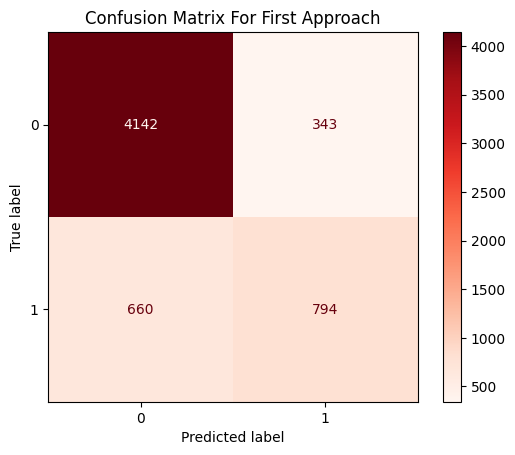

In [8]:
cm_graph = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(conf_matrix.shape[0]))
cm_graph.plot(cmap='Reds', values_format='d')
plt.title('Confusion Matrix For First Approach')
plt.show()

Given the performance metrics above, the log loss is 0.36, which is a low value. This indicates the model is performing pretty well. The accuracy is 83%, which is an average percentage score. An F1-score of 0.75 is pretty good since it is close to 1.0 as it indicates a good balance between precision and recall.

Although the initial metrics are not bad, I will use GridSearch to find the best hyperparameters that will result in even better performance metrics.

In [9]:
from sklearn.model_selection import GridSearchCV
# Define the function to train and test Logistic Regression with GridSearch
def train_test_LogisticRegression_GS(X_train, X_test, y_train, y_test):
  # Created to chain the preprocessing steps + used to fit model and make predictions
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])
    pipeline.fit(X_train, y_train)

    # Create param grid for GridSearchCV
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],         # strength of regularization --> small C = stronger/simple, large C = weaker/complex
        'classifier__max_iter': [100, 150, 200, 300, 400, 500],  # max num of iterations taken to converge
        'classifier__solver': ['liblinear', 'lbfgs']        
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    predictions = best_model.predict_proba(X_test)
    log_loss_val = log_loss(y_test, predictions)
    class_label_predictions = best_model.predict(X_test)
    accuracy_score_val = accuracy_score(y_test, class_label_predictions)
    f1_score_val = f1_score(y_test, class_label_predictions, average='macro')
    cm = confusion_matrix(y_test, class_label_predictions)
    
    return grid_search, log_loss_val, accuracy_score_val, f1_score_val, cm

In [10]:
# Train model and evaluate resulting metrics
gs, loss_gs, accuracy_gs, f1_gs, conf_matrix_gs = train_test_LogisticRegression_GS(X_train, X_test, y_train, y_test)
print("Log Loss = " + str(loss_gs))
print("Accuracy = " + str(accuracy_gs))
print("F1 Score = " + str(f1_gs))
print("Confusion Matrix: \n", conf_matrix_gs)
print("Best Parameters: \n", gs.best_params_)
print("Best Score: \n", gs.best_score_)

Log Loss = 0.36398719799918583
Accuracy = 0.8307795925239939
F1 Score = 0.7527756176006744
Confusion Matrix: 
 [[4135  350]
 [ 655  799]]
Best Parameters: 
 {'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}
Best Score: 
 0.8226478636076615


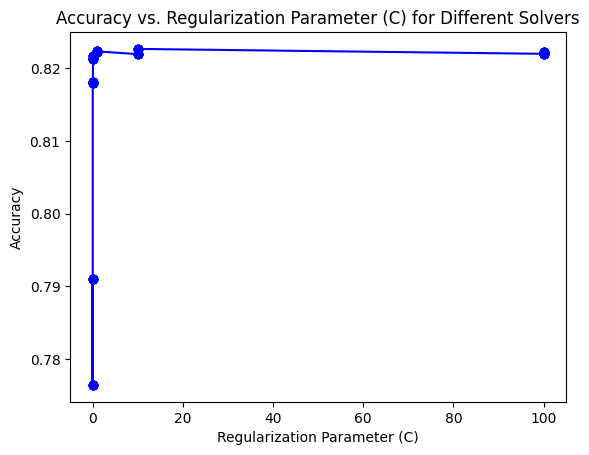

In [11]:
# Accuracy vs C values
results = gs.cv_results_

# Extract F1 Scores and corresponding values of C
accuracy_scores = results['mean_test_score']
C_values = [params['classifier__C'] for params in results['params']]

plt.plot(C_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C) for Different Solvers')
plt.show()

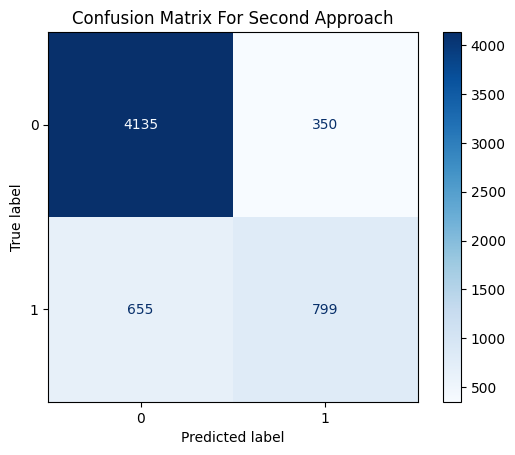

In [12]:
cm_graph_gs = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gs, display_labels=range(conf_matrix_gs.shape[0]))
cm_graph_gs.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix For Second Approach')
plt.show()

Given the above performance metrics of the first and second approach, it can be seen that both approaches have minimal difference in its performance. Although it is true that both approaches perform quite similarly in terms of log loss, accuracy, as well as the confusion matrix, Approach 2 has a better F1-score. This means the second approach does slightly better at balancing precision and recall.  

In addition, Approach 2 fewer false negatives (655 vs 660). And given the optimal paramters of {'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}. The optimal parameters found in grid search indicates that a high regularization parameter of C=10 is best and that the 'lbfgs' solver, which is usually used for larger datasets, produces the best metrics. Futhermore, cross validated best score of 0.8226 this indicates that the second model would be more efficient and effective by providing better generalization overall. Ultimately, though both approaches are similar, Approach 2 is marginally better due to its performance across all key metrics and its optimal parameters identified in grid search.